In [120]:
from deconv.imports import *
from sklearn.utils import resample
import numpy as np
from deconv.figures.common import subplotLabel, getSetup

In [53]:
A_antiD, _, glycan_list = load_tables()
adcc_3a, adcc_3b = load_figures()

In [115]:
num_iters = 100

glycans_3a = []
glycans_3b = []

for i in range(num_iters):
    new3a = resample(adcc_3a, n_samples=40, replace=True, stratify=adcc_3a.index, random_state=0)
    mean_3a = new3a.groupby(level=0).sum() / new3a.groupby(level=0).count()

    new3b = resample(adcc_3b, n_samples=40, replace=True, stratify=adcc_3b.index, random_state=0)
    mean_3b = new3b.groupby(level=0).sum() / new3b.groupby(level=0).count()

    glycans_3a.append(infer_x(A_antiD, mean_3a))
    glycans_3b.append(infer_x(A_antiD, mean_3b))


In [122]:
glycans3a = np.array(glycans_3a)
mean3a = np.mean(glycans3a, axis=0)
error3a = np.std(glycans3a, axis=0)

glycans3b = np.array(glycans_3b)
mean3b = np.mean(glycans3b, axis=0)
error3b = np.std(glycans3b, axis=0)

print(error3a, error3b)



[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.33066907e-16 6.66133815e-16 4.99600361e-16 4.44089210e-16
 1.22124533e-15 5.55111512e-16 9.99200722e-16 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.20417043e-17 1.73472348e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.44089210e-16 8.32667268e-16 5.55111512e-17 3.88578059e-16
 6.66133815e-16 1.55431223e-15 0.00000000e+00 4.44089210e-16
 9.43689571e-16 5.55111512e-16 6.10622664e-16 0.00000000e+00]


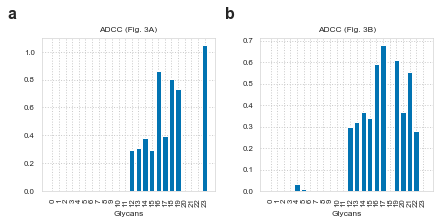

In [121]:
ax, f = getSetup((6, 3), (1, 2))
ax[0].bar(glycan_list, mean3a, yerr=error3a)
ax[0].set_title("ADCC (Fig. 3A)")
ax[0].set_xlabel("Glycans")
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=90)

ax[1].bar(glycan_list, mean3b, yerr=error3b)
ax[1].set_title("ADCC (Fig. 3B)")
ax[1].set_xlabel("Glycans")
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=90)

# Add subplot labels
subplotLabel(ax)